In [10]:
#importing dependencies
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [11]:
#importing and splitting dataset
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [12]:
len(x_train),len(y_test)

(60000, 10000)

In [13]:
x_train.shape

(60000, 28, 28)

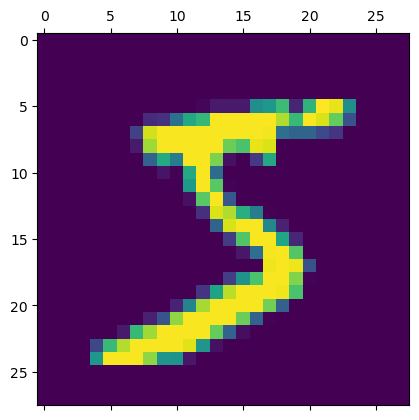

In [8]:
plt.matshow(x_train[0])

In [9]:
y_train[0]

5

In [19]:
x_train=x_train/255
x_test=x_test/255

In [20]:
#flattening x_train  and x_test
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [21]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
#making neural network
#sequential-stack ogf layers in neural network
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8169 - loss: 0.7166
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9120 - loss: 0.3123
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9198 - loss: 0.2915
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9259 - loss: 0.2675
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9256 - loss: 0.2697


In [23]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9152 - loss: 0.3022


[0.26643964648246765, 0.925000011920929]

In [25]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.14199573e-02, 2.57463398e-07, 4.88875024e-02, 9.64565754e-01,
       2.81852647e-03, 8.75434428e-02, 9.93298954e-07, 9.99823630e-01,
       1.03909016e-01, 7.20065951e-01], dtype=float32)

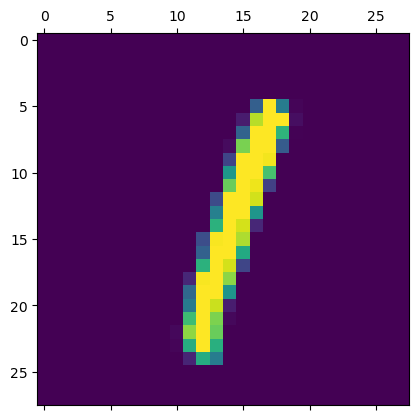

In [26]:
plt.matshow(x_test[5])

In [27]:
y_predicted=model.predict(x_test_flattened)
y_predicted[5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([5.4026488e-05, 9.9757963e-01, 4.9019226e-01, 3.5815239e-01,
       5.9847827e-03, 1.5542685e-02, 9.8611834e-03, 5.5673862e-01,
       5.4636490e-01, 1.5551014e-01], dtype=float32)

In [28]:
np.argmax(y_predicted[5])

1

In [29]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [31]:
#confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   6,    9,  920,   21,   10,    5,   13,   10,   34,    4],
       [   3,    0,   13,  936,    0,   18,    2,   12,   17,    9],
       [   1,    1,    2,    2,  916,    0,   12,    4,   10,   34],
       [   8,    2,    3,   45,   10,  766,   15,    9,   27,    7],
       [  12,    3,    5,    1,    8,   12,  914,    2,    1,    0],
       [   1,    5,   22,    7,    9,    0,    0,  950,    2,   32],
       [   7,    7,    7,   30,    9,   28,    9,   12,  855,   10],
       [  10,    7,    1,   12,   28,    7,    0,   19,    5,  920]])>

Text(95.72222222222221, 0.5, 'True values')

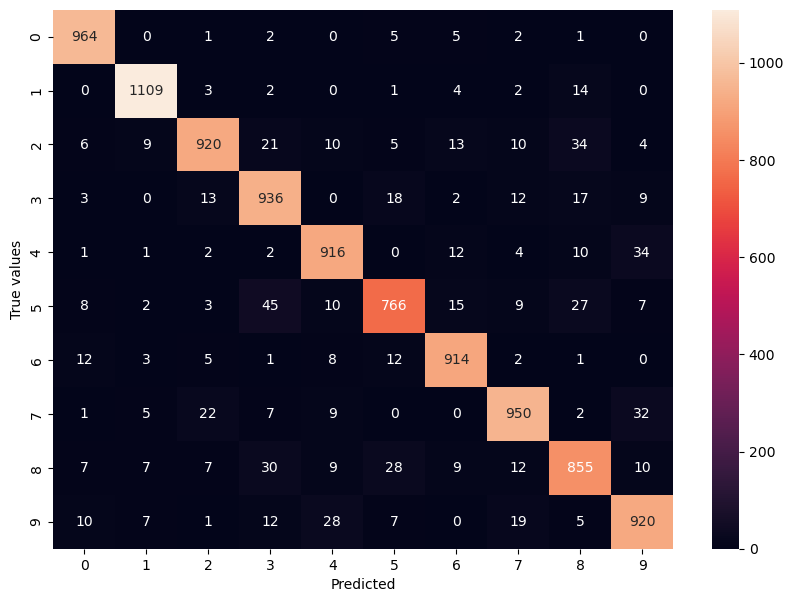

In [32]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True values')

In [34]:
#adding hidden layer
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=5)

C:\Users\Akanksha\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8716 - loss: 0.4575
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9618 - loss: 0.1335
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9731 - loss: 0.0891
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9806 - loss: 0.0672
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9851 - loss: 0.0491


In [35]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9738 - loss: 0.0863


[0.07559064030647278, 0.9763000011444092]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'True values')

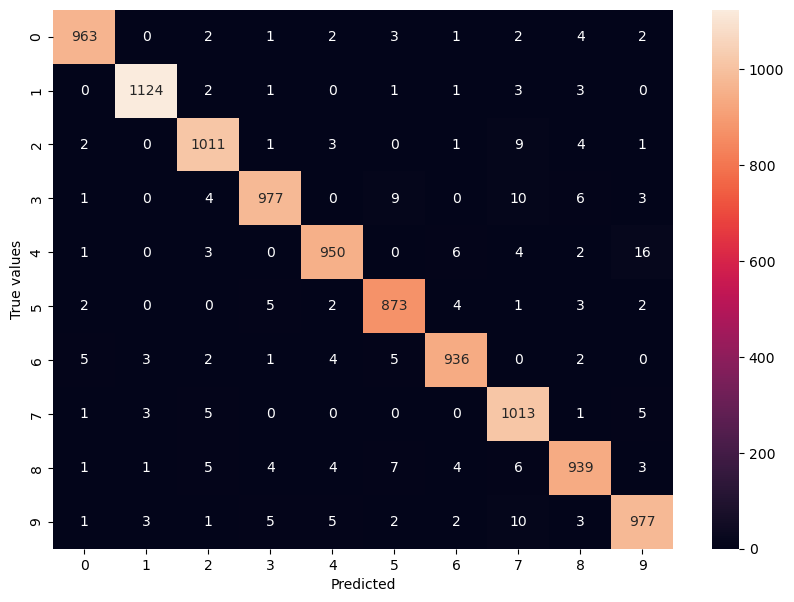

In [38]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in  y_predicted]

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True values')